There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)

# Tugas 1

Tugas Menugukur Jarak (dissimiliarity) menggunakan python
1. ambil data dari keggle/github
2. ukur jarak

d(1,2), d(1,2) d(1,4) objek dari data tersebut

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/DiahDSyntia/Data-Mining/main/biopics.csv", encoding = 'unicode_escape', engine ='python')

In [ ]:
data

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,-,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,-,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,Young Man with a Horn,http://www.imdb.com/title/tt0043153/,US,1950,-,Michael Curtiz,1,Bix Beiderbecke,Musician,Known,White,0,Male,Kirk Douglas
757,Young Mr. Lincoln,http://www.imdb.com/title/tt0032155/,US,1939,-,John Ford,1,Abraham Lincoln,World leader,Known,White,0,Male,Henry Fonda
758,Young Tom Edison,http://www.imdb.com/title/tt0033289/,US,1940,-,Norman Taurog,1,Thomas Edison,Other,Known,White,0,Male,Mickey Rooney
759,Young Winston,http://www.imdb.com/title/tt0069528/,US,1972,-,Richard Attenborough,1,Winston Churchill,World leader,Known,White,0,Male,Simon Ward


In [ ]:
number_of_columns = data.shape[1]

In [ ]:
pd.set_option('display.max_columns', number_of_columns)
pd.set_option('display.max_rows', number_of_columns)

In [ ]:
data.columns

Index(['title', 'site', 'country', 'year_release', 'box_office', 'director',
       'number_of_subjects', 'subject', 'type_of_subject', 'race_known',
       'subject_race', 'person_of_color', 'subject_sex', 'lead_actor_actress'],
      dtype='object')

## Categorical/nominal Features
*   race_known
*   person_of_color

In [ ]:
data[["title","race_known", "person_of_color"]].head(15)

,title,race_known,person_of_color
0,10 Rillington Place,Unknown,0
1,12 Years a Slave,Known,1
2,127 Hours,Unknown,0
3,1987,Known,0
4,20 Dates,Unknown,0
...,...,...,...
10,84 Charing Cross Road,Unknown,0
11,A Beautiful Mind,Unknown,0
12,A Dangerous Method,Known,0
13,A Dangerous Method,Known,0


## Change Values to 1/0
- Take all values of 'race_known' series


*   if values is known change to 1
*   if values is unknown change to 0



In [ ]:
# race_known code
code_race_known_for_known = "Known"
code_race_known_for_unknown = "Unknown"

# binary value
value_of_one = 1
value_of_zero = 0

def change_code_race_known_to_biner(race_known):
    return value_of_one if race_known == code_race_known_for_unknown else value_of_zero

In [ ]:
# Update all values of 'race_known' series
data["race_known"] = data["race_known"].apply(change_code_race_known_to_biner)

In [ ]:
data[["title","race_known", "person_of_color"]].head(7)

,title,race_known,person_of_color
0,10 Rillington Place,1,0
1,12 Years a Slave,0,1
2,127 Hours,1,0
3,1987,0,0
4,20 Dates,1,0
5,21,0,1
6,24 Hour Party People,0,0


In [ ]:
# CONSTAN VARIABLE
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

CONTINGENCY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [ ]:
def get_series(df, idx, series):
    return df.loc[(idx), series]

In [ ]:
def get_dissimilarity_dataset(df, series_index = [], series = []):
    first_series = get_series(df, series_index[0], series)
    second_series = get_series(df, series_index[1], series)
    dataset = pd.concat([first_series,second_series],axis=1)
    return dataset.T

In [ ]:
get_dissimilarity_dataset(data, [1,2], ["race_known", "person_of_color"]).T

,1,2
race_known,0,1
person_of_color,1,0


In [ ]:
data.loc[0:5, ["race_known", "person_of_color"]]

,race_known,person_of_color
0,1,0
1,0,1
2,1,0
3,0,0
4,1,0
5,0,1


In [ ]:
def count_contingency_value(df, start_index = 0, last_index = 1):

    CONTINGENCY_VALUE = {
        "q" : 0,
        "r" : 0,
        "s" : 0,
        "t" : 0,
    }

    column_range = df.shape[1]

    for column in range(column_range):
        for value in CONTINGENCY_TABLE_VALUE:
            item = list((tuple(df.loc[(start_index):(last_index), df.columns[column]]) == CONTINGENCY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    CONTINGENCY_VALUE["q"] += 1
                if item[1] == "r":
                    CONTINGENCY_VALUE["r"] += 1
                if item[1] == "s":
                    CONTINGENCY_VALUE["s"] += 1
                if item[1] == "t":
                    CONTINGENCY_VALUE["t"] += 1

    return CONTINGENCY_VALUE

In [ ]:
# d(1,2)
data_1_2 = get_dissimilarity_dataset(data, [1,2], ["race_known", "person_of_color"])

In [ ]:
c_d_1_2 = count_contingency_value(data_1_2, 1, 2)

In [ ]:
# d(1,3)
data_1_3 = get_dissimilarity_dataset(data, [1,3], ["race_known", "person_of_color"])

In [ ]:
c_d_1_3 = count_contingency_value(data_1_3, 1, 3)

In [ ]:
# d(1,4)
data_1_4 = get_dissimilarity_dataset(data, [1,4], ["race_known", "person_of_color"])

In [ ]:
c_data_1_4 = count_contingency_value(data_1_4, 1, 4)

In [ ]:
# d(1,5)
data_1_5 = get_dissimilarity_dataset(data, [1,5], ["race_known", "person_of_color"])

In [ ]:
c_data_1_5 = count_contingency_value(data_1_5, 1, 5)

### Dissimilarity Binary Assymetric Value Formula

$$
\frac{r + s}{q + r + s}\
$$

In [ ]:
def measure_dissimilarity_binary_value_assymetric_distance(contingency_value):

    return (contingency_value["r"] + contingency_value["s"]) / (contingency_value["q"] + contingency_value["r"] + contingency_value["s"])

In [ ]:
d_1_2 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_3 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_4 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_5 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_6 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)

In [ ]:
d_1_2

1.0

In [ ]:
d_1_3

1.0

In [ ]:
d_1_4

1.0

In [ ]:
d_1_5

1.0

In [ ]:
d_1_6

1.0

# Tugas 2


Carilah data yang bertipe numerik ( data klassifikasi)

Lakukan proses diskritisasi dengan equal width dan equal frequency

Lakukan proses diskritisasi dengan basis entropy

Kumpulkan tugas dengan link github ( web statis dari jupyter book)

**Cari** **Data**
sumber Data Bunga Iris

In [1]:
import pandas as pd

In [2]:
# source data
dataset_url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"

In [3]:
# membuat dataframe
dataFrame = pd.read_csv(dataset_url)

In [4]:
# show first 15 rows
dataFrame.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [5]:
# CONSTAN SERIES

SEPAL_LENGTH_SERIES = dataFrame["sepal.length"]
SEPAL_WIDTH_SERIES = dataFrame["sepal.width"]
PETAL_LENGTH_SERIES = dataFrame["petal.length"]
PETAL_WIDTH_SERIES = dataFrame["petal.width"]

## Hitung Data

## Definisi discretization

1. Proses mengubah data bertipe data numeric menjadi data bertipe categorical

2. Diskritisasi memiliki 2 pendekatan yaitu equal-width intervals dan equal-frequency intervals

3. equal-width intervals adalah diskritisasi dengan lebar data yang sama

4. equal-frequency intervals adalah diskritisasi dengan jumlah data yang sama

### Cut
#### Cut

* Cut adalah sebuah *method* pada library *pandas* untuk melakukan perhitungan *equal width frequency intervals*


```
# Syntax
pd.cut(series, interval, right=True, label)
```

### Sepal Width
Equal Width Intervals lebar kelopak bunga Iris

Dikelompokkan menjadi 3 kategori yaitu

Kategori sedikit lebar

Kategori lebar

Kategori sangat lebar

In [6]:
# equal-width intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

sepal_width_ew_binning = pd.cut(SEPAL_WIDTH_SERIES, amount_of_binning, True, labels)
labelled_sepal_width_ew_binning = sepal_width_ew_binning.value_counts()
interval_sepal_width_ew_binning = pd.cut(SEPAL_WIDTH_SERIES, amount_of_binning, True).value_counts()

In [7]:
# dataframe of sepal-width and sepal category
dataFrame_sepal_width_ew = pd.DataFrame(pd.concat((SEPAL_WIDTH_SERIES, sepal_width_ew_binning), axis=1))

In [8]:
# change columns name
dataFrame_sepal_width_ew.columns = ["sepal.width", "category"]

In [9]:
dataFrame_sepal_width_ew

,sepal.width,category
0,3.5,Lebar
1,3.0,Lebar
2,3.2,Lebar
3,3.1,Lebar
4,3.6,Lebar
...,...,...
145,3.0,Lebar
146,2.5,Sedikit Lebar
147,3.0,Lebar
148,3.4,Lebar


In [10]:
# equal-width intervals binning with label
labelled_sepal_width_ew_binning

Lebar            88
Sedikit Lebar    47
Sangat Lebar     15
Name: sepal.width, dtype: int64

In [11]:
# equal-width intervals without label
interval_sepal_width_ew_binning

(2.8, 3.6]      88
(1.998, 2.8]    47
(3.6, 4.4]      15
Name: sepal.width, dtype: int64

### Petal Width
Equal Width Intervals lebar mahkota bunga Iris

Dikelompokkan menjadi 3 kategori yaitu

Kategori sedikit lebar

Kategori lebar

Kategori sangat lebar

In [12]:
# equal-width intervals
labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

petal_width_ew_binning = pd.cut(PETAL_WIDTH_SERIES, amount_of_binning, True, labels)
labelled_petal_width_ew_binning = petal_width_ew_binning.value_counts()
interval_petal_width_ew_binning = pd.cut(PETAL_WIDTH_SERIES, amount_of_binning, True).value_counts()

In [13]:
# dataframe of petal-width and petal category
pd.concat((PETAL_WIDTH_SERIES, petal_width_ew_binning), axis=1)

,petal.width,petal.width
0,0.2,Sedikit Lebar
1,0.2,Sedikit Lebar
2,0.2,Sedikit Lebar
3,0.2,Sedikit Lebar
4,0.2,Sedikit Lebar
...,...,...
145,2.3,Sangat Lebar
146,1.9,Sangat Lebar
147,2.0,Sangat Lebar
148,2.3,Sangat Lebar


In [14]:
# equal-width intervals with label
labelled_petal_width_ew_binning

Lebar            54
Sedikit Lebar    50
Sangat Lebar     46
Name: petal.width, dtype: int64

In [15]:
# equal-width intervals without label
interval_petal_width_ew_binning

(0.9, 1.7]       54
(0.0976, 0.9]    50
(1.7, 2.5]       46
Name: petal.width, dtype: int64

### Sepal Length
Equal Width Intervals panjang kelopak bunga Iris

Dikelompokkan menjadi 3 kategori yaitu

Kategori sedikit lebar

Kategori lebar

Kategori sangat lebar

In [16]:
# equal-width intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

sepal_length_ew_binning = pd.cut(SEPAL_LENGTH_SERIES, amount_of_binning, True, labels)
labelled_sepal_length_ew_binning = sepal_length_ew_binning.value_counts()
interval_sepal_length_ew_binning = pd.cut(SEPAL_LENGTH_SERIES, amount_of_binning, True).value_counts()

In [17]:
# dataframe of sepal-width and sepal category
pd.concat((SEPAL_LENGTH_SERIES, sepal_length_ew_binning), axis=1)

,sepal.length,sepal.length
0,5.1,Sedikit Lebar
1,4.9,Sedikit Lebar
2,4.7,Sedikit Lebar
3,4.6,Sedikit Lebar
4,5.0,Sedikit Lebar
...,...,...
145,6.7,Lebar
146,6.3,Lebar
147,6.5,Lebar
148,6.2,Lebar


In [18]:
# equal-width intervals with label
labelled_sepal_length_ew_binning

Lebar            71
Sedikit Lebar    59
Sangat Lebar     20
Name: sepal.length, dtype: int64

In [19]:
# equal-width intervals without label
interval_sepal_length_ew_binning

(5.5, 6.7]      71
(4.296, 5.5]    59
(6.7, 7.9]      20
Name: sepal.length, dtype: int64

### Petal Length
Equal Width Intervals panjang mahkota bunga Iris

Dikelompokkan menjadi 3 kategori yaitu

Kategori sedikit lebar

Kategori lebar

Kategori sangat lebar

In [20]:
# equal-width intervals
labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

petal_length_ew_binning = pd.cut(PETAL_LENGTH_SERIES, amount_of_binning, True, labels)
labelled_petal_length_ew_binning = petal_length_ew_binning.value_counts()
interval_petal_length_ew_binning = pd.cut(PETAL_LENGTH_SERIES, amount_of_binning, True).value_counts()

In [21]:
# dataframe of petal-width and petal category
pd.concat((PETAL_LENGTH_SERIES,petal_length_ew_binning), axis=1)

,petal.length,petal.length
0,1.4,Sedikit Lebar
1,1.4,Sedikit Lebar
2,1.3,Sedikit Lebar
3,1.5,Sedikit Lebar
4,1.4,Sedikit Lebar
...,...,...
145,5.2,Sangat Lebar
146,5.0,Sangat Lebar
147,5.2,Sangat Lebar
148,5.4,Sangat Lebar


In [22]:
# equal-width intervals binning with label
labelled_petal_length_ew_binning

Lebar            54
Sedikit Lebar    50
Sangat Lebar     46
Name: petal.length, dtype: int64

In [23]:
# equal-width intervals out label
interval_petal_length_ew_binning

(2.967, 4.933]    54
(0.994, 2.967]    50
(4.933, 6.9]      46
Name: petal.length, dtype: int64

### Qcut
Qcut adalah sebuah method pada library pandas untuk melakukan perhitungan equal frequency intervals

 
###Syntax
pd.qcut(series, interval, label)

### Sepal Width
Equal Frequency Intervals lebar kelopak bunga Iris

Dikelompokkan menjadi 3 kategori yaitu

Kategori sedikit lebar

Kategori lebar

Kategori sangat lebar

In [24]:
# equal-frequency intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

sepal_width_ef_binning = pd.qcut(SEPAL_WIDTH_SERIES, amount_of_binning, labels)
labelled_sepal_width_ef_binning = sepal_width_ef_binning.value_counts()
interval_sepal_width_ef_binning = pd.qcut(SEPAL_WIDTH_SERIES, amount_of_binning).value_counts()

In [25]:
# dataframe of sepal-width and sepal category
pd.concat((SEPAL_WIDTH_SERIES, sepal_width_ef_binning), axis = 1)

,sepal.width,sepal.width
0,3.5,Sangat Lebar
1,3.0,Lebar
2,3.2,Lebar
3,3.1,Lebar
4,3.6,Sangat Lebar
...,...,...
145,3.0,Lebar
146,2.5,Sedikit Lebar
147,3.0,Lebar
148,3.4,Sangat Lebar


In [26]:
# equal-frequency intervals binning with label
labelled_sepal_width_ef_binning

Sedikit Lebar    57
Lebar            50
Sangat Lebar     43
Name: sepal.width, dtype: int64

In [27]:
# equal-frequency intervals out label
interval_sepal_width_ef_binning

(1.999, 2.9]    57
(2.9, 3.2]      50
(3.2, 4.4]      43
Name: sepal.width, dtype: int64

### Petal Width
Equal Frequency Intervals lebar mahkota bunga Iris

Dikelompokkan menjadi 3 kategori yaitu

Kategori sedikit lebar

Kategori lebar

Kategori sangat lebar

In [28]:
# equal-frequency intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

petal_width_ef_binning = pd.qcut(PETAL_WIDTH_SERIES, amount_of_binning, labels)
labelled_petal_width_ef_binning = petal_width_ef_binning.value_counts()
interval_petal_width_ef_binning = pd.qcut(PETAL_WIDTH_SERIES, amount_of_binning).value_counts()

In [29]:
# dataframe of petal-width and petal category
dataFrame_petal_width_ef = pd.DataFrame(pd.concat((PETAL_WIDTH_SERIES, petal_width_ef_binning), axis = 1))

In [30]:
dataFrame_petal_width_ef

,petal.width,petal.width
0,0.2,Sedikit Lebar
1,0.2,Sedikit Lebar
2,0.2,Sedikit Lebar
3,0.2,Sedikit Lebar
4,0.2,Sedikit Lebar
...,...,...
145,2.3,Sangat Lebar
146,1.9,Sangat Lebar
147,2.0,Sangat Lebar
148,2.3,Sangat Lebar


In [31]:
# change columns name
dataFrame_petal_width_ef.columns = ["petal_width", "category"]

In [32]:
# equal-frequency intervals binning with label
labelled_petal_width_ef_binning

Lebar            52
Sedikit Lebar    50
Sangat Lebar     48
Name: petal.width, dtype: int64

In [33]:
# equal-frequency intervals without label
interval_petal_width_ef_binning

(0.867, 1.6]      52
(0.099, 0.867]    50
(1.6, 2.5]        48
Name: petal.width, dtype: int64

### Sepal Length
Equal Frequency Intervals panjang kelopak bunga Iris

Dikelompokkan menjadi 3 kategori yaitu

Kategori sedikit lebar

Kategori lebar

Kategori sangat lebar

In [34]:
# equal-frequency intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

sepal_length_ef_binning = pd.qcut(SEPAL_LENGTH_SERIES, amount_of_binning, labels)
labelled_sepal_length_ef_binning = sepal_length_ef_binning.value_counts()
interval_sepal_length_ef_binning = pd.qcut(SEPAL_LENGTH_SERIES, amount_of_binning).value_counts()

In [35]:
# dataframe of sepal-length and sepal category
pd.concat((SEPAL_LENGTH_SERIES, sepal_length_ef_binning), axis=1)

,sepal.length,sepal.length
0,5.1,Sedikit Lebar
1,4.9,Sedikit Lebar
2,4.7,Sedikit Lebar
3,4.6,Sedikit Lebar
4,5.0,Sedikit Lebar
...,...,...
145,6.7,Sangat Lebar
146,6.3,Lebar
147,6.5,Sangat Lebar
148,6.2,Lebar


In [36]:
# equal-frequency intervals binning with label
labelled_sepal_length_ef_binning

Lebar            56
Sedikit Lebar    52
Sangat Lebar     42
Name: sepal.length, dtype: int64

In [37]:
# equal-frequency intervals out label
interval_sepal_length_ef_binning

(5.4, 6.3]                   56
(4.2989999999999995, 5.4]    52
(6.3, 7.9]                   42
Name: sepal.length, dtype: int64

### Petal Length
Equal Frequency Intervals panjang mahkota bunga Iris

Dikelompokkan menjadi 3 kategori yaitu

Kategori sedikit lebar

Kategori lebar

Kategori sangat lebar

In [38]:
# equal-frequency intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

petal_length_ef_binning = pd.qcut(PETAL_LENGTH_SERIES, amount_of_binning, labels)
labelled_petal_length_ef_binning = petal_length_ef_binning.value_counts()
interval_petal_length_ef_binning = pd.qcut(PETAL_LENGTH_SERIES, amount_of_binning).value_counts()

In [39]:
# dataframe of petal-length and petal category
pd.concat((PETAL_LENGTH_SERIES, petal_length_ef_binning), axis=1)

,petal.length,petal.length
0,1.4,Sedikit Lebar
1,1.4,Sedikit Lebar
2,1.3,Sedikit Lebar
3,1.5,Sedikit Lebar
4,1.4,Sedikit Lebar
...,...,...
145,5.2,Sangat Lebar
146,5.0,Sangat Lebar
147,5.2,Sangat Lebar
148,5.4,Sangat Lebar


In [40]:
# equal-frequency intervals binning with label
labelled_petal_length_ef_binning

Lebar            54
Sedikit Lebar    50
Sangat Lebar     46
Name: petal.length, dtype: int64

In [41]:
# equal-frequency intervals out label
interval_petal_length_ef_binning

(2.633, 4.9]      54
(0.999, 2.633]    50
(4.9, 6.9]        46
Name: petal.length, dtype: int64

### Sepal Length
- Equal Frequency Intervals panjang kelopak bunga Iris
- Equal Frequency Intervals panjang mahkota bunga Iris
- Dikelompokkan menjadi 3 kategori yaitu
- Kategori sedikit lebar
- Kategori lebar
- Kategori sangat lebar

### Petal Length
- Equal Frequency Intervals panjang mahkota bunga Iris
- Dikelompokkan menjadi 3 kategori yaitu
- Kategori sedikit lebar
- Kategori lebar
- Kategori sangat lebar

### Definisi Entropy-based Binning

1.   Metode untuk mengelompokkan data *numeric* menjadi *categorical*
2.   Pengelompokkan dengan mencari jumlah pembagi yang terabaik
3.   Hasil pengelompokkan terbaik adalah dengan *entropy gain* yang paling besar


*  Rumus Entropy

$$
\begin{align*}
\displaystyle Entropy(S) &= \sum_{i=0}^{k} -pi \ log_{2} \ pi \\
\end{align*}
$$

#### Persiapan


*   Impor modul log2 dari *package math*
*   Ambil data yang akan digunakan


```
# dataframe about petal width (Equeal Frequency Interval)
df_petal_width_ef
```

*  Tentukan label


```
labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
```

In [42]:
# module to calculate log
from math import log2

In [43]:
# dataframe
target_data = dataFrame_petal_width_ef
target_data

,petal_width,category
0,0.2,Sedikit Lebar
1,0.2,Sedikit Lebar
2,0.2,Sedikit Lebar
3,0.2,Sedikit Lebar
4,0.2,Sedikit Lebar
...,...,...
145,2.3,Sangat Lebar
146,1.9,Sangat Lebar
147,2.0,Sangat Lebar
148,2.3,Sangat Lebar


In [44]:
# category label
labels = ["sedikit_lebar", "lebar", "sangat_lebar"]

##### Functions

Fungsi menghitung banyaknya data setiap kategori

In [45]:
# count every value based the given category
def countEveryCategory(data_column, labels, column, category):
    group = data_column.groupby(category).count()
    amount_of_every_category = []
    for label in labels:
        amount_of_every_category.append(group.loc[label, column])
    return amount_of_every_category

Fungsi menghitung banyaknya data setiap kategori berdasarkan nilai pembagi atau split value yang diberikan

In [46]:
# split the given data based on category and split value 
def split(split_value, data_column, labels, col, category):
    less_group = data_column[data_column[col] < split_value]
    greater_group = data_column[data_column[col] >= split_value]
    
    length_less_group = countEveryCategory(less_group, labels, col, category)
    length_greater_group = countEveryCategory(greater_group, labels, col, category)
    
    return (length_less_group, length_greater_group)

###### Fungsi menghitung perbedaan *gain* antara entropi inisial dengan entropi nilai pembagi yang diberikan




---
$$Gain(E_{new}) = (E_{initial}) \ - (E_{new})$$
---

In [47]:
# count information gain from inisial entropy and new entropy
def count_gain(inisial_entropy, new_entropy):
  return inisial_entropy - new_entropy

### Fungsi menghitung entropy

In [48]:
# count entropy
def count_entropy(data_target):
    all_prob = []
    for prob in data_target:
        if (prob/sum(data_target) != 0):
            all_prob.append(prob/sum(data_target) * log2(prob/sum(data_target)))
        else:
            all_prob.append(0)
    return -(sum(all_prob))

###### Fungsi menghitung Info entropy berdasarkan nilai pembagi atau *split value* yang diberikan


---



$$ Info_A(D) = \frac{|D_1|}{|D|} Entropy (D_1)\frac{|D_2|}{|D|}+ Entropy (D_2)$$

In [49]:
# count entropy for given a split value
def info(d, data_target):
    temp = []
    for value in d:
        temp.append((sum(value) / data_target.shape[0]) * count_entropy(value))
    return sum(temp)

###### Implementasi


*   Hitung target *entropy*
*   Hitung target *entropy* dengan *split value*
*   Hitung *entropy gain*

In [50]:
# entropy data target
initial_data_target_entropy = count_entropy(countEveryCategory(target_data, labels, target_data.columns[0], target_data.columns[1]))

KeyError: ignored

In [ ]:
# count Entropy for the target given a split value, split value = 0.7
entropy_data_target_1 = info(split(0.7, target_data, labels, target_data.columns[0], target_data.columns[1]), target_data)

KeyError: ignored

In [ ]:
# information gain (entropy data target and entropy_data_target_1)
count_gain(initial_data_target_entropy, entropy_data_target_1)

NameError: ignored

# Tugas 3
## Implementasi K-NN Pada database Iris

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data = pd.read_csv(url)

In [ ]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Memisahkan Features dan Label

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

Membagi data latih dan uji

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=10)

Label Endcoding

In [ ]:
lb = LabelEncoder()
lb.fit(y_train)

y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

### Standarisasi
Algoritma KNN menggunakan metrik jarak (Euclidean), sehingga memiliki data yang terdistribusi merata khususnya pada distribusi normal akan meningkatkan performa model KNN ini. Maka dari itu diperlukan proses standarisasi data.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

menentukan nilai konstanta K

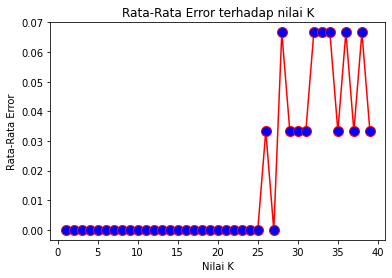

In [ ]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 40), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

Training

Menggunakan nilai Konstanta K=4

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Evaluation

Mengecek akurasi model yang dibuat

In [ ]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=lb.classes_))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        10
   Virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Tugas 4

In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
url = 'https://raw.githubusercontent.com/DiahDSyntia/Data-Mining/main/Iris.csv'
iris = pd.read_csv(url)

In [53]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
iris.drop(columns="Id",inplace=True)

In [55]:
x=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [57]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB

In [58]:
#Train and Test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [59]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


# Tugas 5 Iris

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/DiahDSyntia/Data-Mining/main/Iris.csv'
columns = ['sepal-length','sepal-width','petal-length','petal-width','class']
data = pd.read_csv(url)

In [ ]:
data.drop(columns='Id',inplace=True)

In [ ]:
x = data.values[:, 0:4]

In [ ]:
y = data.values[:,4]

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label = le.fit_transform(y)

In [ ]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
dfkelas = pd.DataFrame(label, columns=['class'])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new = pca.fit_transform(x)

In [ ]:
x_new

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [ ]:
from sklearn.cluster import KMeans
#number of cluster
kmeans = KMeans = KMeans(n_clusters=3)
#fitting the input data
kmeans= kmeans.fit(x_new)
#getting the clusters  labels
prediksi = kmeans.predict(x_new)
#centroids values
centroids = kmeans.cluster_centers_

In [ ]:
centroids

array([[ 2.34645113,  0.27235455],
       [-2.64084076,  0.19051995],
       [ 0.66443351, -0.33029221]])

In [ ]:
x_new[:,1:12].shape

(150, 1)

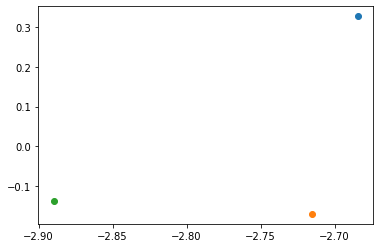

In [ ]:
from numpy import unique
from matplotlib import pyplot
from numpy import where 
yhat = unique(prediksi)
clusters = unique(yhat)
#create scatter plot for samples from each cluster
for cluster in clusters:
  #get row indexes for samples with this cluster
  row_ix = where (yhat == cluster)
  #create scatter of these samples
  pyplot.scatter(x_new[row_ix,0],x_new[row_ix,1])
#show the plot
pyplot.show()

In [ ]:
a=prediksi
mapping = {1:0, 0:1, 2:2}
a = [mapping[i] for i in a]

In [ ]:
prediksi = np.array(a)
prediksi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(label,prediksi)

0.44666666666666666

In [ ]:
type(x_new[row_ix, 0])

numpy.ndarray

In [ ]:
x_new[row_ix,0]

array([[-2.88981954]])

In [ ]:
x[row_ix,1]

array([[3.2]], dtype=object)

In [ ]:
yhat

array([0, 1, 2], dtype=int32)

# **UTS SEMESTER 5**


## No 1. Implementasi KNN Pada Data

In [ ]:
import pandas as pd
#read in the data using pandas
url = 'https://raw.githubusercontent.com/DiahDSyntia/Data-Mining/main/dataR2.csv'
df = pd.read_csv(url)
#check data has been read in properly
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
#check number of rows and columns in dataset
df.shape

(116, 10)

In [ ]:
#create a dataframe with all training data except the target column
X = df.drop(columns=['Classification'])
#check that the target variable has been removed
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [ ]:
#separate target values
y = df['Classification'].values
#view target values
y[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([1, 2, 1, 2, 2])

In [ ]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.3333333333333333

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.5        0.52173913 0.47826087 0.47826087 0.60869565]
cv_scores mean:0.5173913043478261


In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 23}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.5688405797101449

Text(0, 0.5, 'Mean Error')

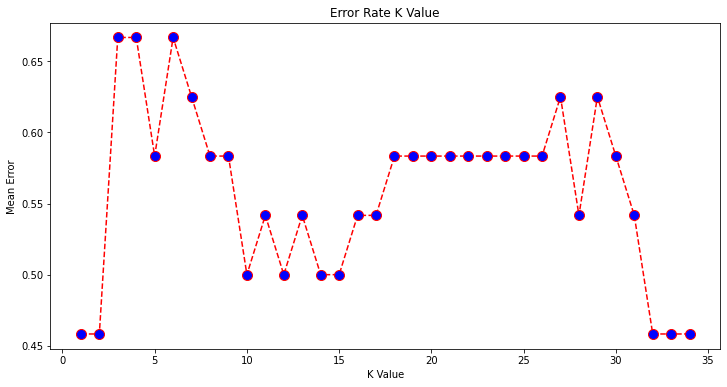

In [ ]:
# Calculating error for K values between 2 and 10
error = []
import matplotlib.pyplot as plt
for i in range(1, 35):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 35), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## No. 2 Metode pohon keputusan (Desision tree)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

url = 'https://raw.githubusercontent.com/DiahDSyntia/Data-Mining/main/dataR2.csv'
data = pd.read_csv(url)

In [ ]:
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [ ]:
y = data["Classification"]
X = data.drop(columns=["Classification"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

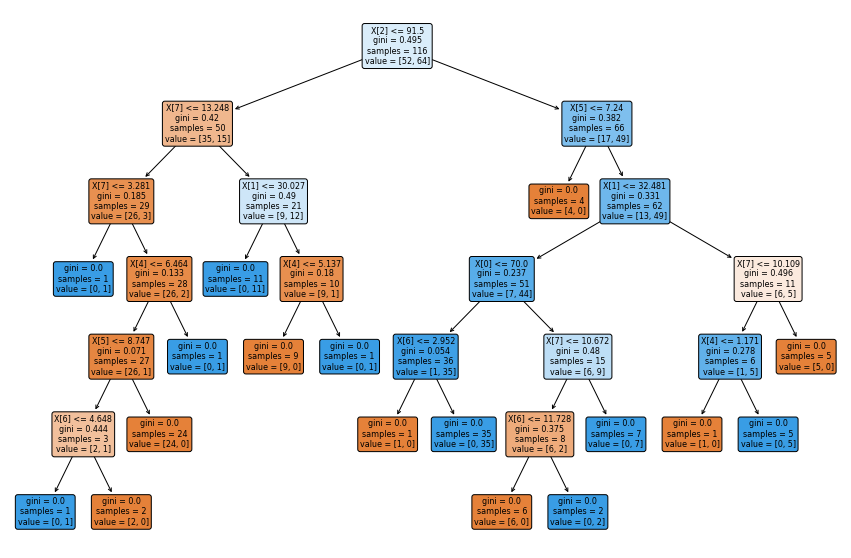

In [ ]:
#plt the figure, setting a black background
plt.figure(figsize=(15,10))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()